# Exercise 4: How many clusters of grain?

In the video, you learnt how to choose a good number of clusters for a dataset using the k-means inertia graph.  You are given a dataset of the measurements of samples of grain.  What's a good number of clusters in this case?

This dataset was obtained from the [UCI](https://archive.ics.uci.edu/ml/datasets/seeds).

**Step 1:** Load the dataset _(written for you)_.

In [2]:
import pandas as pd

seeds_df = pd.read_csv('seeds.csv')
# forget about the grain variety for the moment - we'll use this later
del seeds_df['grain_variety']
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


**Step 2:** Display the DataFrame to inspect the data.  Notice that there are 7 columns - so each grain sample (row) is a point in 7D space!  Scatter plots can't help us here.

In [3]:
seeds_df.describe()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


**Step 3:** Extract the measurements from the DataFrame using its `.values` attribute:

In [26]:
samples = seeds_df.values
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


**Step 4:**  _(Written for you)_. Measure the quality of clusterings with different numbers of clusters using the
inertia.  For each of the given values of `k`, perform the following steps:

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the grain data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.

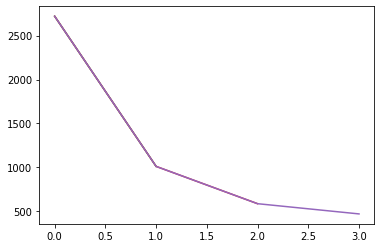

In [33]:
from sklearn.cluster import KMeans

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    kk = model.fit(samples)
    plt.plot(inertias)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

**Step 5:**  Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

In [ ]:
import matplotlib.pyplot as plt
plt.hist(inertias)

**Excellent work!** You can see from the graph that 3 is a good number of clusters, since these are points where the inertia begins to decrease more slowly.